<a href="https://colab.research.google.com/github/barauna-lo/Code_Library/blob/main/The_Cartwheel_Galaxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.nasa.gov/feature/goddard/2022/webb-captures-stellar-gymnastics-in-the-cartwheel-galaxy

https://arxiv.org/abs/2210.06499

In [ ]:
%%capture 
!pip install galmask
!wget https://github.com/Yash-10/galmask/blob/main/example/gal1_G.fits 
!wget https://github.com/Yash-10/galmask/blob/main/example/gal2_R.fits
!wget https://github.com/Yash-10/galmask/blob/main/example/gal2_orig_segmap_R.fits
!wget https://github.com/Yash-10/galmask/blob/main/example/gal_seg1.fits
!wget https://github.com/Yash-10/galmask/blob/main/example/kernel.fits

In [ ]:
import galmask.galmasl

In [ ]:
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import AsinhStretch, ImageNormalize, ZScaleInterval, LogStretch

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('font', family='sans-serif')

from galmask.galmask import galmask

def axes_colorbar(ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.3)
    return cax

filepath = 'gal1_G.fits'
image = fits.getdata(filepath)
npixels, nlevels, nsigma, contrast, min_distance, num_peaks, num_peaks_per_label, connectivity, remove_local_max = 5, 32, 3., 0.001, 1, 10, 3, 4, True
hdul = fits.open('gal_seg1.fits')
objects = hdul[3].data
seg_image = objects.astype('uint8')

start = timer()
galmasked, galsegmap = galmask(
    image, npixels, nlevels, nsigma, contrast, min_distance, num_peaks, num_peaks_per_label,
    connectivity=4, kernel=fits.getdata('kernel.fits'), seg_image=seg_image, mode="0",
    remove_local_max=True, deblend=True
)
end = timer()

print(f'Execution time: {end-start}s')

fig, ax = plt.subplots(1, 4, figsize=(24, 6))

vmin = min(image.min(), galmasked.min())
vmax = max(image.max(), galmasked.max())

# fig.suptitle(filepath)
norm1 = ImageNormalize(image, vmin=vmin, vmax=vmax, stretch=LogStretch())
im0 = ax[0].imshow(image, norm=norm1, origin='lower', cmap='gray')
ax[0].set_title("Original image")
cax0 = axes_colorbar(ax[0])
fig.colorbar(im0, cax=cax0, orientation='horizontal')

im1 = ax[1].imshow(objects, origin='lower')
ax[1].set_title("Original segmentation map (NoiseChisel)")
cax1 = axes_colorbar(ax[1])
fig.colorbar(im1, cax=cax1, orientation='horizontal')

im2 = ax[2].imshow(galsegmap, origin='lower', cmap='gray')
ax[2].set_title("Final segmentation map (galmask)")
cax2 = axes_colorbar(ax[2])
fig.colorbar(im2, cax=cax2, orientation='horizontal')

norm2 = ImageNormalize(galmasked, vmin=vmin, vmax=vmax, stretch=LogStretch())
im3 = ax[3].imshow(galmasked, norm=norm2, origin='lower', cmap='gray')
ax[3].set_title("Final image (galmask)")
cax3 = axes_colorbar(ax[3])
fig.colorbar(im3, cax=cax3, orientation='horizontal')

plt.savefig('galmask_example1.png', bbox_inches='tight', dpi=400)

plt.show()

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt

from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

In [ ]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')

In [ ]:
ls

gal1_G.fits              gal2_R.fits    kernel.fits    sample_data/
gal2_orig_segmap_R.fits  gal_seg1.fits  kernel.fits.1  show1.py


In [ ]:
fits.info(image_file)

Filename: /root/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [ ]:
image_file = 'gal2_orig_segmap_R.fits'
image_data = fits.getdata(image_file)

OSError: ignored

In [ ]:

print(image_data.shape)

(893, 891)


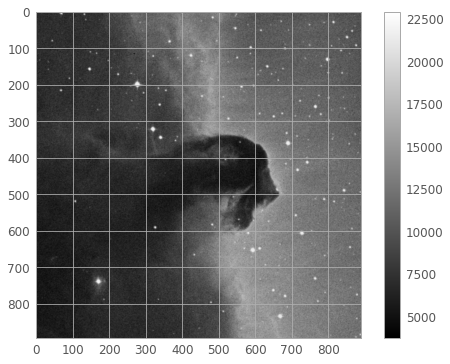

In [ ]:
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()